## Experiments on context window

In [1]:
import interp as ip
import tsfm


CUDA available: False


In [ ]:
# batch load the model
dir_name = "C:/Users/15896/myenv/Hydra/mech_interp_capstone/data/Toyweights"
models = ip.batch_load_model(dir_name)

In [16]:
ctx_window = 10
samples, omegas, times = ip.data_generator(200, ctx_window)

In [17]:
matexp_target = ip.generate_matexp_targets(samples, omegas, times)
period_target = ip.generate_periodicity_targets(samples, omegas, times)

In [20]:
reverse = False
max_r2_dict_matexp = ip.maxR2_models(
    models,
    matexp_target,
    samples,
    reverse=reverse,
    trunc=100,
)
max_r2_dict_period = ip.maxR2_models(
    models,
    period_target,
    samples,
    reverse=reverse,
    trunc=100
)

In [ ]:
for key in max_r2_dict_matexp:
    print(key, max_r2_dict_matexp[key])

print("\n\n")
for key in max_r2_dict_period:
    print(key, max_r2_dict_period[key])
    


Text(0.5, 1.0, 'matexp vs period R2')

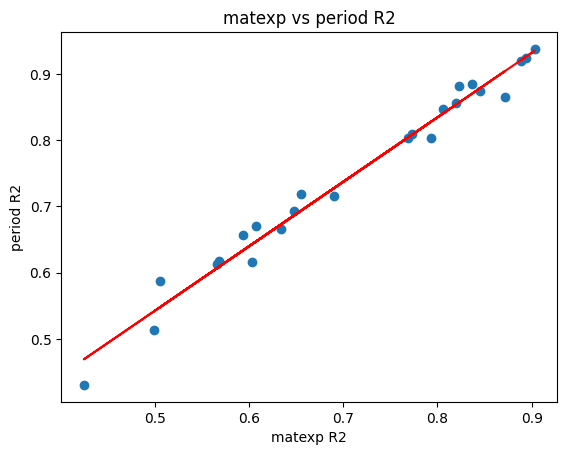

In [22]:
# The correlations

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

period_r2 = []
matexp_r2 = []

for key in max_r2_dict_matexp:
    matexp_r2.append(max_r2_dict_matexp[key][0])
    period_r2.append(max_r2_dict_period[key][0])


plt.scatter(matexp_r2, period_r2)
# Reshape the data for sklearn
matexp_r2 = np.array(matexp_r2).reshape(-1, 1)
period_r2 = np.array(period_r2)

# Perform linear regression
reg = LinearRegression().fit(matexp_r2, period_r2)
predicted_period_r2 = reg.predict(matexp_r2)

# Plot the regression line
plt.plot(matexp_r2, predicted_period_r2, color='red')
plt.xlabel("matexp R2")
plt.ylabel("period R2")
plt.title("matexp vs period R2")
